In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import torch
import tensorflow as tf
import scipy.stats as stat
import pylab
%matplotlib inline

In [2]:
df=pd.read_csv('./titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### For Normally Distributed Data

<ipython-input-9-a9ae5d3ed9e3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].dropna())


<Axes: xlabel='Age', ylabel='Density'>

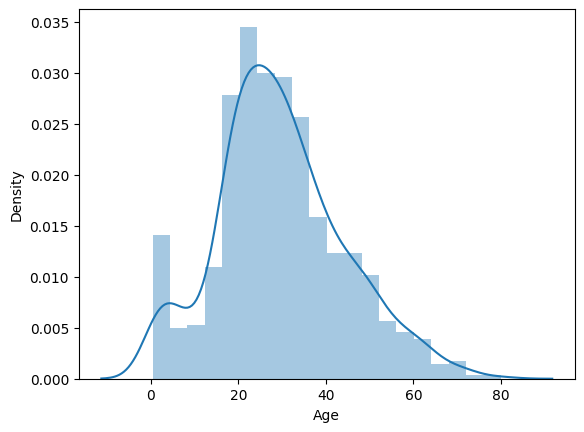

In [9]:
sns.distplot(df['Age'].dropna()) ## Almost Normally Distributed

<ipython-input-20-cae6718c3714>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].fillna(df['Age'].median()),bins=50)


<Axes: xlabel='Age', ylabel='Density'>

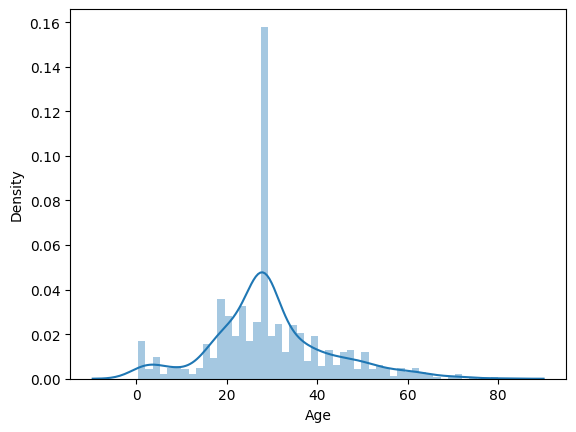

In [20]:
sns.distplot(df['Age'].fillna(df['Age'].median()),bins=50)

<Axes: xlabel='Age', ylabel='Count'>

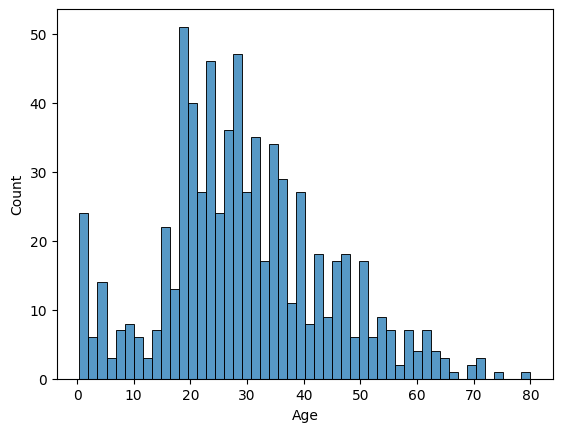

In [11]:
sns.histplot(df['Age'],bins=50) ## Almost Normally Distributed

<Axes: ylabel='Age'>

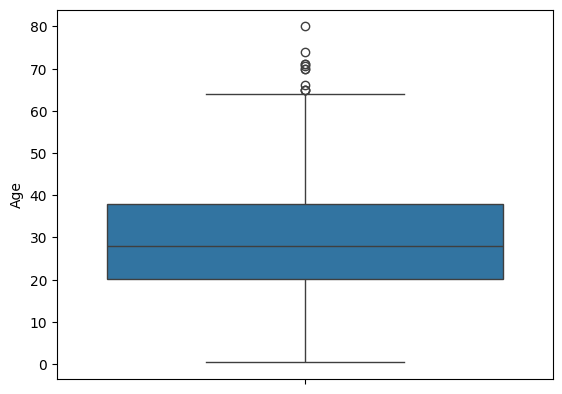

In [15]:
sns.boxplot(y='Age',data=df) ## To check outliers

In [17]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [21]:
## Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers
uppper_boundary=df['Age'].mean() + 3* df['Age'].std() ## x_mean + 3*sigma
lower_boundary=df['Age'].mean() - 3* df['Age'].std() ## x_mean - 3*sigma
print(lower_boundary)
print(uppper_boundary)
print(df['Age'].mean())
print(df['Age'].std())

-13.880374349943303
73.27860964406094
29.69911764705882
14.526497332334042


### For Skewed Data

<Axes: xlabel='Fare', ylabel='Count'>

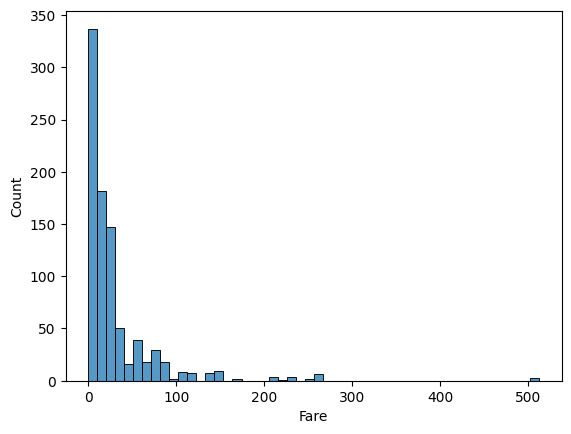

In [26]:
sns.histplot(df['Fare'],bins=50) ## Right-Skewed

<Axes: ylabel='Fare'>

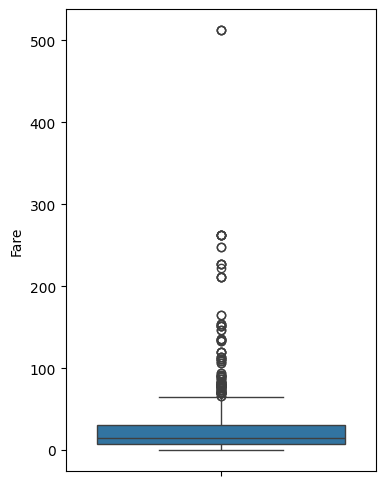

In [33]:
plt.figure(figsize=(4,6))
sns.boxplot(y='Fare',data=df)

In [34]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [35]:
IQR = df['Fare'].quantile(0.75)-df['Fare'].quantile(0.25) ## Inter-Quartile Range
IQR

23.0896

In [36]:
lower_bridge=df['Fare'].quantile(0.25)-(IQR*1.5) ## Lower whisker of box plot if data points exist lesser than this (If not then lower whisker is the min value)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-26.724
65.6344


In [39]:
## Extreme outliers
lower_boundary=df['Fare'].quantile(0.25)-(IQR*3)
upper_boundary=df['Fare'].quantile(0.75)+(IQR*3)
print(lower_boundary)
print(upper_boundary)

-61.358399999999996
100.2688


### Removing Outliers

In [40]:
data=df.copy()

In [41]:
data.loc[data['Age']>=73,'Age']=73 ## Removing the outliers beyond upper boundary for 'Age' by replacing them with upper boundary

<Axes: xlabel='Age', ylabel='Count'>

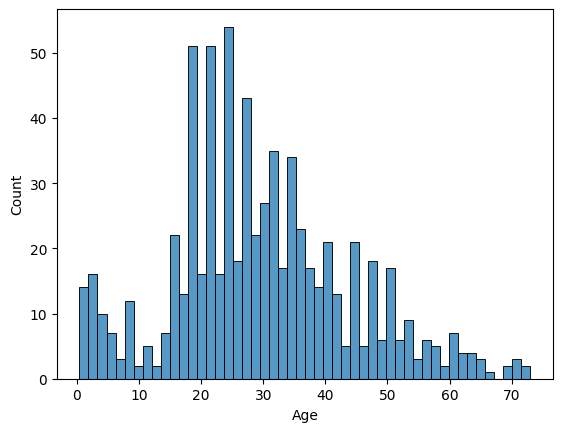

In [43]:
sns.histplot(data['Age'],bins=50)

In [42]:
data.loc[data['Fare']>=100,'Fare']=100 ## Removing the outliers beyond upper boundary for 'Fare' by replacing them with upper boundary

<Axes: xlabel='Fare', ylabel='Count'>

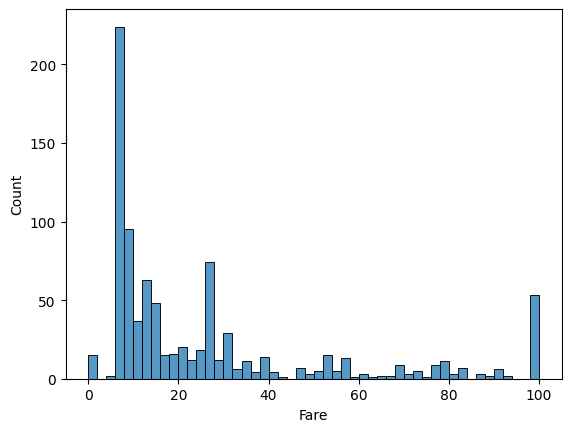

In [45]:
sns.histplot(data['Fare'],bins=50)